
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 1 - Local Search <br>
<font color=696880 size=4>
Ali Aghayari


____

# Personal Data

In [ ]:
# Set your student number
student_number = '98108695'
Name = 'Ali'
Last_Name = 'Ghaemdoust'

# Rules

<font color=red>
Please run all the cells.
</font>

# Libraries

In [ ]:
!pip install tsp_solver2

In [ ]:
# import libraries here
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import time
import itertools
from tsp_solver.greedy import solve_tsp


# Q1: TSP problem

## Problem Definition

Consider the Euclidean  [Traveling Salesperson Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem):</br>
- In this problem, we are considering a country with n cities that are randomly placed; our country is a 1000 by 1000 square; we want to find the shortest tour for this country using their coordinates.
- A tour is a cycle that passes each city precisely one time.
- In this notebook we will develop some solutions to the problem, and more generally show how to think about solving a problem like this.



## Problem Representation (20 Points)

 We want to create our problem structure and present some valuable methods in this part.
 - init: choose your problem structure and create the variables accordingly.
 - distance: take two cities and return the distance between them.
 - tour length: get a tour and return the length of the given tour.
 - The shortest tour: get a set of tours and return the shortest one.
 - plot tour: get a tour and plot tour of the country.
 - nearest_neighbor: get a semi-tour and return to the nearest city to the last element you have yet to visit.

In [ ]:
class TSP:

  def __init__(self, num_cities, cities = None):
    self.num_cities = num_cities
    if cities is None:
      self.cities = [[] for i in range(num_cities)]
      for i in range(num_cities):
        self.cities[i] = [random.randint(0, 1000), random.randint(0, 1000)]
    else:
      self.cities = cities
    pass

  def distance(self, A, B):
    x_A, y_A = self.cities[A]
    x_B, y_B = self.cities[B]
    return math.sqrt((x_A-x_B)**2 + (y_A-y_B)**2)
    pass

  def tour_length(self, tour):
    length = 0
    for i in range(len(tour)-1):
      length += self.distance(tour[i], tour[i+1])
    return length
    pass

  def shortest_tour(self, tours):
    min_length = 0
    for tour in tours:
      l = self.tour_length(tour)
      if min_length > l:
        min_length = l
    return min_length
    pass

  def plot_tour(self, tour):
    x_val = []
    y_val = []
    for city in tour:
      x_val.append(self.cities[city][0])
      y_val.append(self.cities[city][1])
    for i in range(len(x_val)):
      plt.plot(x_val[i:i+2], y_val[i:i+2], 'ro-')
    plt.show()
    pass

  def nearest_neighbor(self, A, cities, count = None):
    if count is None:
      shortest = float('inf')
      closest_city = 0
      for city in range(len(cities)):
        l = self.distance(A, city)
        if l < shortest and l != 0:
          shortest = l
          closest_city = city
      return closest_city
    else:
      neighbors = {}
      for city in range(len(cities)):
        l = self.distance(A, city)
        if l != 0:
          neighbors[l] = city
      sorted_neighbors = dict(sorted(neighbors.items()))
      return list(sorted_neighbors.values())[:count-1]
    pass

## Brute Force (5 Points)

Let's start with an algorithm that is guaranteed to solve the problem (although it is inefficient for large sets of cities) </br>
we can achieve this by generating all possible tours of the cities and choosing the shortest tour (the one with minimum tour length).

In [ ]:
def alltours_tsp(tsp):
  all_tours = list(itertools.permutations(np.arange(tsp.num_cities)))
  shortest_tour_length = float('inf')
  shortest_tour = []
  for tour in all_tours:
    l = tsp.tour_length(tour)
    if l < shortest_tour_length:
      shortest_tour_length = l
      shortest_tour = tour
  return shortest_tour
  pass

Now, try to create a country with five cities and apply your brute force function to find the shortest tour.

In [ ]:
country = TSP(5, None)
t = alltours_tsp(country)

Visualize your answer for the TSP problem

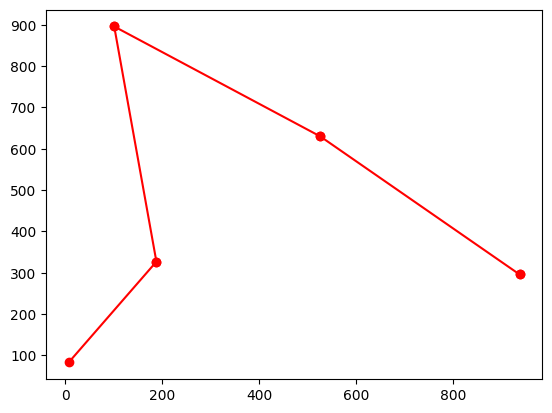

In [ ]:
country.plot_tour(alltours_tsp(country))



Try this algorithm on countries with 4, 6, 8, and 10 cities and plot the time it takes to calculate the answer.

In [ ]:
country1 = TSP(4, None)
country2 = TSP(6, None)
country3 = TSP(8, None)
country4 = TSP(10, None)

start1 = time.time()
alltours_tsp(country1)
end1 = time.time()

start2 = time.time()
alltours_tsp(country2)
end2 = time.time()

start3 = time.time()
alltours_tsp(country3)
end3 = time.time()

start4 = time.time()
alltours_tsp(country4)
end4 = time.time()

t = [4, 6, 8, 10]
tm = [end1-start1, end2-start2, end3-start3, end4-start4]
plt.plot(t, tm)

## local Algorithms

### Initial Functions (25 Points)

We will create some functions for our initial state and use these functions for our local algorithms later.

- random initial function: Create a feasible tour randomly.

In [ ]:
def random_initial(tsp):
  tour = np.random.permutation(np.arange(tsp.num_cities))
  return tour, tsp.tour_length(tour)
  pass

- nearest neighbor initial function: Start at any city; at each step, extend the tour by moving from the previous city to its nearest neighbor that has yet to be visited.

In [ ]:
def nearest_neighbor_initial(tsp):
  city = random.choice(np.arange(tsp.num_cities))
  tour = [0 for _ in range(tsp.num_cities)]
  visited_cities = [False for _ in range(tsp.num_cities)]
  tour[0] = city
  visited_cities[city] = True
  for i in range(tsp.num_cities-1):
    city_nums = tsp.nearest_neighbor(tour[i], tsp.cities, tsp.num_cities)
    for city_num in city_nums:
      if visited_cities[city_num] is False:
        tour[i+1] = city_num
        visited_cities[city_num] = True
        break
  return tour, tsp.tour_length(tour)
  pass

- repeated nearest neighbor initial function : You can improve nearest neighbor algorithm by running it multiple times with different starting cities and using the best-generated answer.

In [ ]:
def repeated_nearest_neighbor_initial(tsp, repetitions = None):
  if repetitions is None:
    repetitions = tsp.num_cities
    tours = [[] for _ in range(repetitions)]
    Tours_length = [0 for _ in range(repetitions)]
    min_length = float('inf')
    best_generated_answer = 0
    for i in range(repetitions):
      tours[i] , Tours_length[i] = nearest_neighbor_initial(tsp)
      if Tours_length[i] < min_length:
        min_length = Tours_length[i]
        best_generated_answer = i
    return tours[best_generated_answer], Tours_length[best_generated_answer]
  else:
    tours = [[] for _ in range(repetitions)]
    Tours_length = [0 for _ in range(repetitions)]
    min_length = float('inf')
    best_generated_answer = 0
    for i in range(repetitions):
      tours[i] , Tours_length[i] = nearest_neighbor_initial(tsp)
      if Tours_length[i] < min_length:
        min_length = Tours_length[i]
        best_generated_answer = i
    return tours[best_generated_answer], Tours_length[best_generated_answer]
  pass

Now, try to create a country with 30 cities, apply your repeated_nearest_neighbor_initial function with repetitions of 1, 4, 8, 12, and compare the results.

In [ ]:
my_country = TSP(30, None)
lengths = [0 for _ in range(4)]
_, lengths[0] = repeated_nearest_neighbor_initial(my_country, 1)
_, lengths[1] = repeated_nearest_neighbor_initial(my_country, 4)
_, lengths[2] = repeated_nearest_neighbor_initial(my_country, 8)
_, lengths[3] = repeated_nearest_neighbor_initial(my_country, 12)
print(lengths)

[3735.498658997095, 4185.2890789474, 4183.542711405616, 3735.498658997095]


Does repetition make our answer optimal? "surely not"

- beam search initial function: Start with a list of n cities; at each step, extend your semi-tours by moving from their previous cities to their n nearest neighbors and then pick out n semi-tours from these generated semi-tours of length i+1

In [ ]:
def beam_search_initial(tsp, n, iter):
  queue = []
  for num in random.sample(list(np.arange(tsp.num_cities)), n):
    queue.append([num])
  print(queue)
  for _ in range(iter):
    tour_generated = dict()
    for j in range(n):
      n_nearest_neighbors = tsp.nearest_neighbor(queue[j][-1], tsp.cities, n)
      print(n_nearest_neighbors)
      for k in range(n-1):
        element = [queue[j].append(n_nearest_neighbors[k])]
        print(element)
        print(type(element))
        tour_generated[tsp.tour_length(element)] = element
      print(tour_generated)
    n_sorted_tour_generated = [list(dict(sorted(tour_generated.items())).values())]
    queue = n_sorted_tour_generated[:n-1]
    print(queue)
  best_option = float('inf')
  selected_tour = []
  for t in queue:
    l = tsp.tour_length(t)
    if l < best_option:
      best_option = l
      selected_tour = t
  return selected_tour, best_option
  pass

In [ ]:
c = TSP(10, None)
beam_search_initial(c, 3, 20)

[[1], [8], [6]]
[3, 8]
[None]
<class 'list'>
[None]
<class 'list'>
{0: [None]}
[3, 2]
[None]
<class 'list'>
[None]
<class 'list'>
{0: [None]}
[4, 1]
[None]
<class 'list'>
[None]
<class 'list'>
{0: [None]}
[[[None]]]


TypeError: list indices must be integers or slices, not list

Now, try to create a country with 30 cities, apply these initial functions, and compare the tour length of these initial tours with each other and the optimal answer (if city_num is low).

In [ ]:
local_country = TSP(30, None)
randm_tour, randm_length = random_initial(local_country)
nn_tour, nn_length = nearest_neighbor_initial(local_country)
rnn_tour, rnn_length = repeated_nearest_neighbor_initial(local_country)
#beam_tour, beam_length = beam_search_initial(local_country, 10, 100)
print(f"random_initial length :   {randm_length}")
print(f"nearest_neighbor_initial length :   {nn_length}")
print(f"repeated_nearest_neighbor_initial length :   {rnn_length}")

random_initial length :   15612.31357101873
nearest_neighbor_initial length :   5145.399478416453
repeated_nearest_neighbor_initial length :   4349.033584825674


Plot these tours and compare them visually.

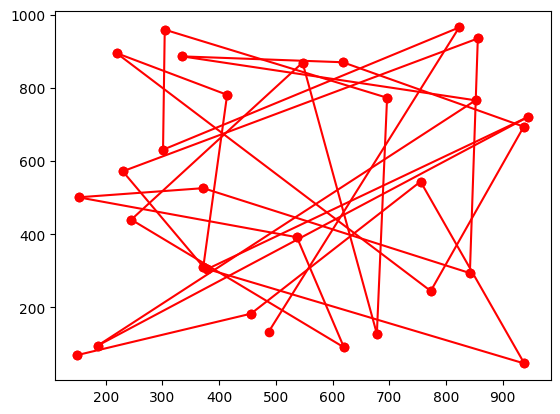

In [ ]:
local_country.plot_tour(randm_tour)

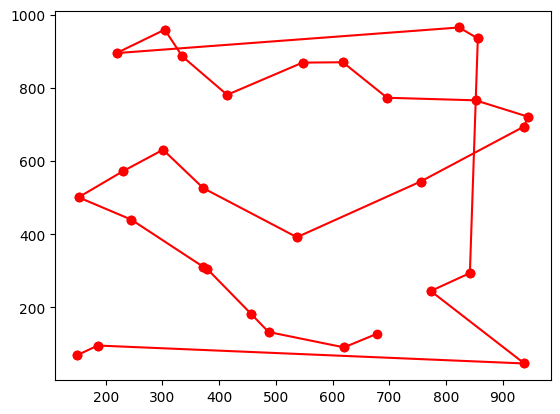

In [ ]:
local_country.plot_tour(nn_tour)

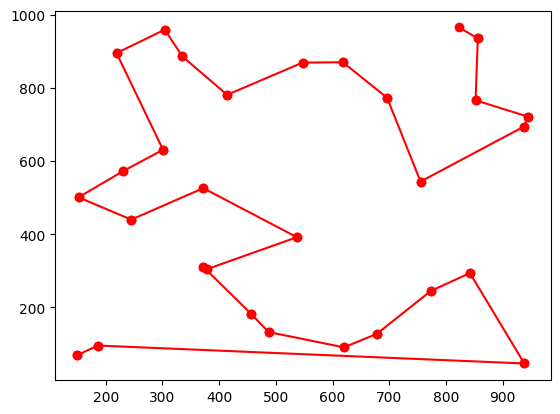

In [ ]:
local_country.plot_tour(rnn_tour)

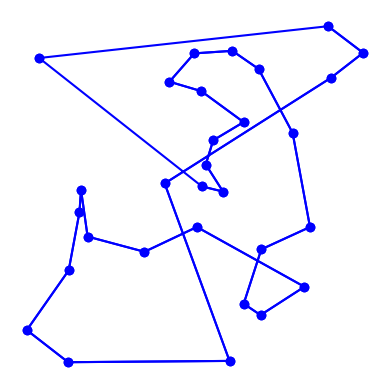

In [ ]:
# TODO: plot the tours accordingly (beam)

### LKH (25 Points)

Implement a simplified version of [LKH](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwimj7nFoqCEAxWzh_0HHc98Df4QFnoECCQQAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FLin%25E2%2580%2593Kernighan_heuristic&usg=AOvVaw0G05-wkkun1YAp6zPfWuLd&opi=89978449) for this problem.</br>
- This local search algorithm takes the initial state and improves it over time by swapping a part of the tour sequence.
- In this modified version, we will check every (i,j) pair at each iteration and reverse the tour from index "I" to index "J" if it improves our tour.


In [ ]:
def lin_kernighan(tsp, initial, iterations=10):
  for _ in range(iterations):
    for i in range(tsp.num_cities):
      for j in range(i+1):
        l1 = tsp.tour_length(initial)
        initial[i], initial[j] = initial[j], initial[i]
        l2 = tsp.tour_length(initial)
        if l1 < l2:
          initial[i], initial[j] = initial[j], initial[i]
  return initial, tsp.tour_length(initial)
  pass


Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

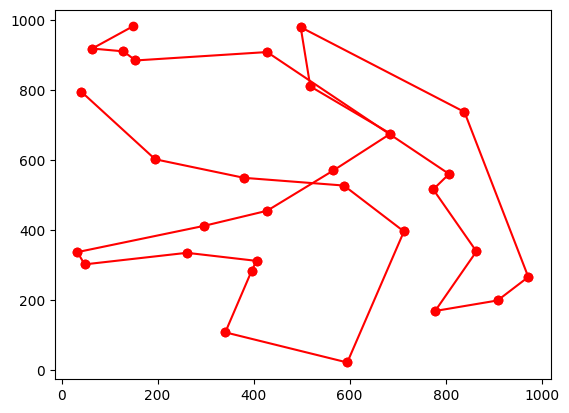

In [ ]:
country5 = TSP(30, None)
t, l = lin_kernighan(country5, random_initial(country5)[0], 20)
country5.plot_tour(t)

### Simulated Annealing (25 Points)

Implement simulated annealing for this problem.

In [ ]:
def simulated_annealing(tsp, initial, initial_temperature=1000, cooling_rate=0.99, num_iterations=10000):
  neighbors = []
  for _ in range(num_iterations):
    for i in range(tsp.num_cities-1):
      for j in range(i+1, tsp.num_cities):
        temp = list(initial)
        temp[i], temp[j] = temp[j], temp[i]
        neighbors.append(temp)
    probability = [0 for _ in range(len(neighbors))]
    init_length = tsp.tour_length(initial)
    for count, neighbor in enumerate(neighbors):
      delta = init_length - tsp.tour_length(neighbor)
      if delta < 0:
        probability[count] = 1
        initial_temperature *= cooling_rate
      else:
        probability[count] = math.exp(-delta/initial_temperature)
        initial_temperature *= cooling_rate
    divisor = sum(probability)
    probability_scaled = [p/divisor for p in probability]
    index = np.random.choice(np.arange(len(neighbors)), size=1, p = probability_scaled)
    initial = neighbors[index[0]]
  return initial, tsp.tour_length(initial)
  pass

Run this algorithm on a reasonably big country and visualize it.</br>
You can use any initial state in this part.

In [ ]:
country6 = TSP(30, None)
country6.plot_tour(simulated_annealing(country6, random_initial(country6)[0])[0])

KeyboardInterrupt: 

### Analysis

- The given code can calculate an acceptable approximated answer.
- use this code to compare your algorithms.

In [ ]:
# path = solve_tsp(tsp.distances)
# tsp.plot_tour(path)
# print(tsp.tour_length(path))

AttributeError: 'TSP' object has no attribute 'distances'

- analyze the lengths you get from the two algorithms with different initial functions
- plot these tours and explain the results (results may be inconsistent as they are approximations)

In [ ]:
# TODO: test different initial functions on your two algorithms using the same TSP problem
# TODO: also create an answer using the given library
# TODO: compare these answers numerically and visually
# note : The value of the given code (threshold) is not a hard threshold!
# note : Don't forget to compare different answers by plotting; you may need to remake a plotting function

treshhold :  5088.321690342922
lkh random :  5560.5087325268305
lkh nn :  4972.965905533968
lkh rnn :  4925.109743108109
lkh beam :  5195.99892896092
simulated random :  4957.463069159989
simulated nn :  4594.853524659973
simulated rnn :  5132.343542346472
simulated beam :  4878.484568419222
